<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Convolutional Neural Networks for Image Classification

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
single_image = x_train[0]

In [10]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
# 28x28 pixels
single_image.shape

(28, 28)

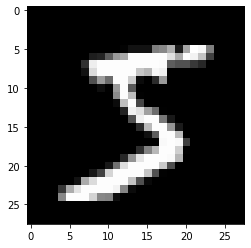

In [21]:
plt.imshow(single_image, cmap='gray')
plt.show()

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Keras has an easy to use function for this:

In [17]:
from tensorflow.keras.utils import to_categorical

In [22]:
y_example = to_categorical(y_train)

In [23]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [24]:
y_example.shape

(60000, 10)

In [25]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
y_cat_test = to_categorical(y_test, 10)

In [27]:
y_cat_train = to_categorical(y_train, 10)

### Processing X Data

We should normalize the X data

In [28]:
single_image.max()

255

In [29]:
single_image.min()

0

In [30]:
x_train = x_train/255
x_test = x_test/255

In [31]:
scaled_image = x_train[0]

In [32]:
scaled_image.max()

1.0

In [33]:
scaled_image.min()

0.0

In [36]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

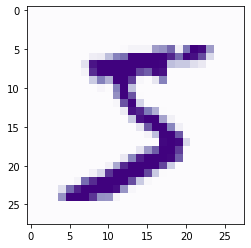

In [35]:
plt.imshow(scaled_image, cmap='Purples')
plt.show()

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [39]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [40]:
# batch_size, width, height, color_channels
x_test = x_test.reshape(10000,28,28,1)

# Training the Model